# Problema Adesão de Funcionários IBM Kaggle.

Esse desafio tem como objetivo criar um modelo de machine learning capaz de prever se funcionários da IBM tem ou não alta chance de pedir desligamento.
Assim, queremos prever a variável Attrition.

Além disso temos os seguintes descrições para variáveis catagóricas:

Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'
EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

Variáveis categóricas ordinais
Education, EnvironmentSatisfaction, JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance

Variáveis categoticas:Education, EnvironmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
Numericas Age, DailyRate, DistanceFromHome, EmployeeCount, EmployeeNumber, HourlyRate, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike,



In [232]:
# Import libs de manipulação e visualização de Dados

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [233]:
# Leitura dos Dados
df_init = pd.read_csv('../data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df_init.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [234]:
df_init.shape

(1470, 35)

In [235]:
# Verificando informações básicas
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [236]:
# Verificação de Valors Faltantes
df_init.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [237]:
df_init['Attrition'].value_counts()/df_init.shape[0]

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

# Separação do Conjunto de Validação

In [238]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(test_size=0.15)

In [239]:
for x,y in split.split(df_init, df_init['Attrition']):
    df_raw = df_init.iloc[x]
    df_teste = df_init.iloc[y]


In [241]:
df_raw.reset_index(inplace=True)

In [242]:
df_raw.drop(['index'], axis=1, inplace=True)

In [243]:
df_raw

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,46,No,Travel_Frequently,1211,Sales,5,4,Marketing,1,62,...,3,80,0,14,4,3,9,6,0,8
1,21,No,Travel_Rarely,1343,Sales,22,1,Technical Degree,1,669,...,3,80,0,3,2,3,3,2,1,2
2,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
3,32,No,Travel_Rarely,977,Research & Development,2,3,Medical,1,1671,...,3,80,2,10,4,2,9,5,1,6
4,53,No,Travel_Frequently,124,Sales,2,3,Marketing,1,1050,...,1,80,1,30,2,3,15,7,6,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,50,No,Travel_Frequently,1234,Research & Development,20,5,Medical,1,1606,...,3,80,1,32,3,3,30,8,12,13
1245,45,No,Travel_Rarely,192,Research & Development,10,2,Life Sciences,1,544,...,4,80,2,8,3,2,2,2,0,2
1246,36,No,Travel_Rarely,711,Research & Development,5,4,Life Sciences,1,1651,...,3,80,2,9,6,3,3,2,0,2
1247,24,No,Travel_Rarely,1127,Research & Development,18,1,Life Sciences,1,150,...,3,80,1,6,2,3,5,3,1,2


## Seleção Identificações Categóricas

In [244]:
# Seleção Identificações Categóricas
## Objects
df_cat = df_raw.select_dtypes(include='object')
df_cat

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,No,Travel_Frequently,Sales,Marketing,Male,Sales Executive,Single,Y,Yes
1,No,Travel_Rarely,Sales,Technical Degree,Male,Sales Representative,Single,Y,No
2,No,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Divorced,Y,No
3,No,Travel_Rarely,Research & Development,Medical,Male,Research Scientist,Divorced,Y,No
4,No,Travel_Frequently,Sales,Marketing,Female,Sales Executive,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1244,No,Travel_Frequently,Research & Development,Medical,Male,Healthcare Representative,Married,Y,Yes
1245,No,Travel_Rarely,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
1246,No,Travel_Rarely,Research & Development,Life Sciences,Female,Healthcare Representative,Married,Y,No
1247,No,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Married,Y,No


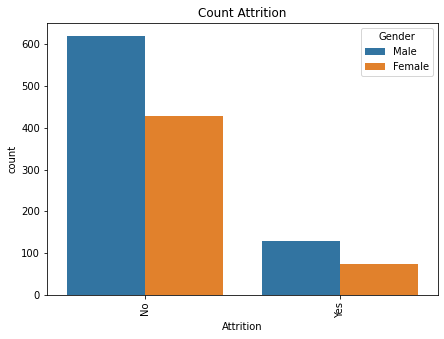

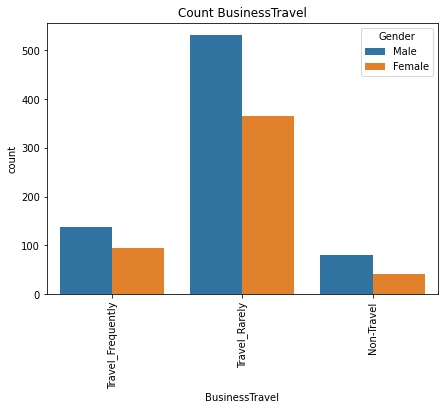

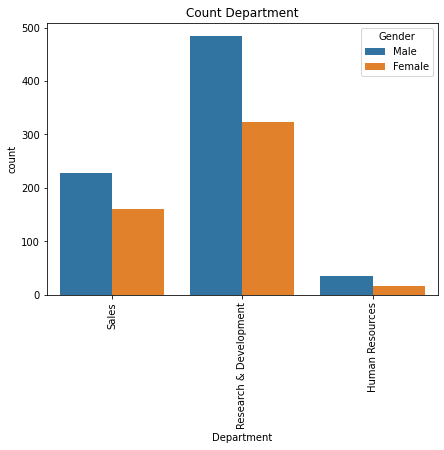

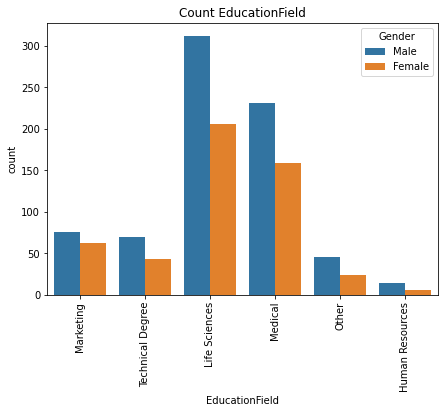

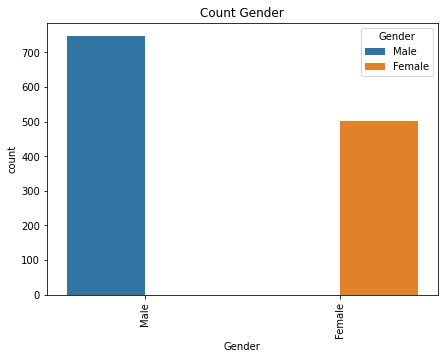

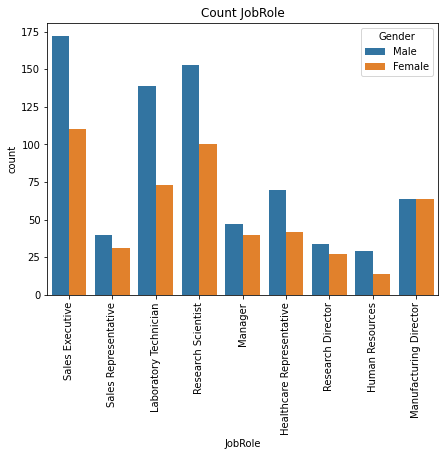

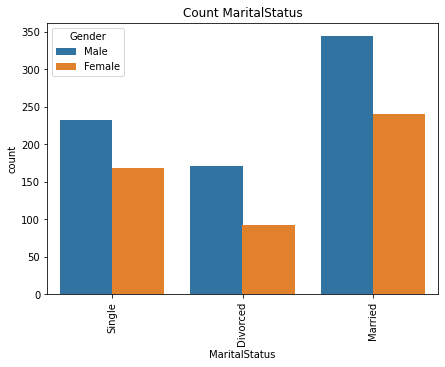

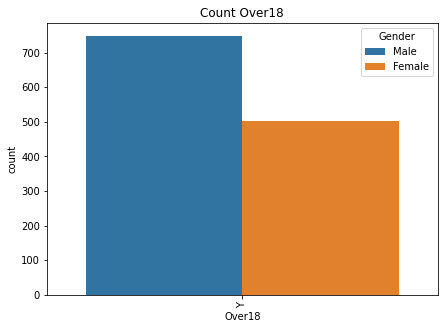

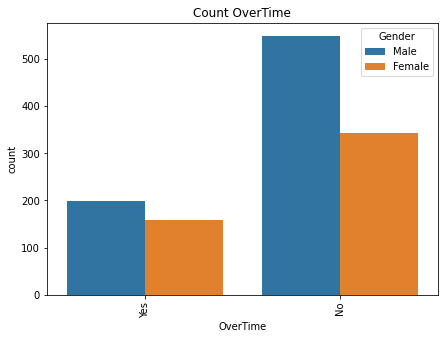

In [245]:

for i in df_cat.columns:
    plt.figure(figsize=(7,5))
    plt.title('Count {}'.format(i))
    plt.xticks(rotation=90)
    sns.countplot(x=i,hue='Gender', data=df_cat);
    #print(i)

plt.show()

Bool: *Attrition, Gender, OverTime*
Ordinal: BusinessTravel
Ohe: Department, EducationField, JobRole, MaritalStatus

Descartar: Over18

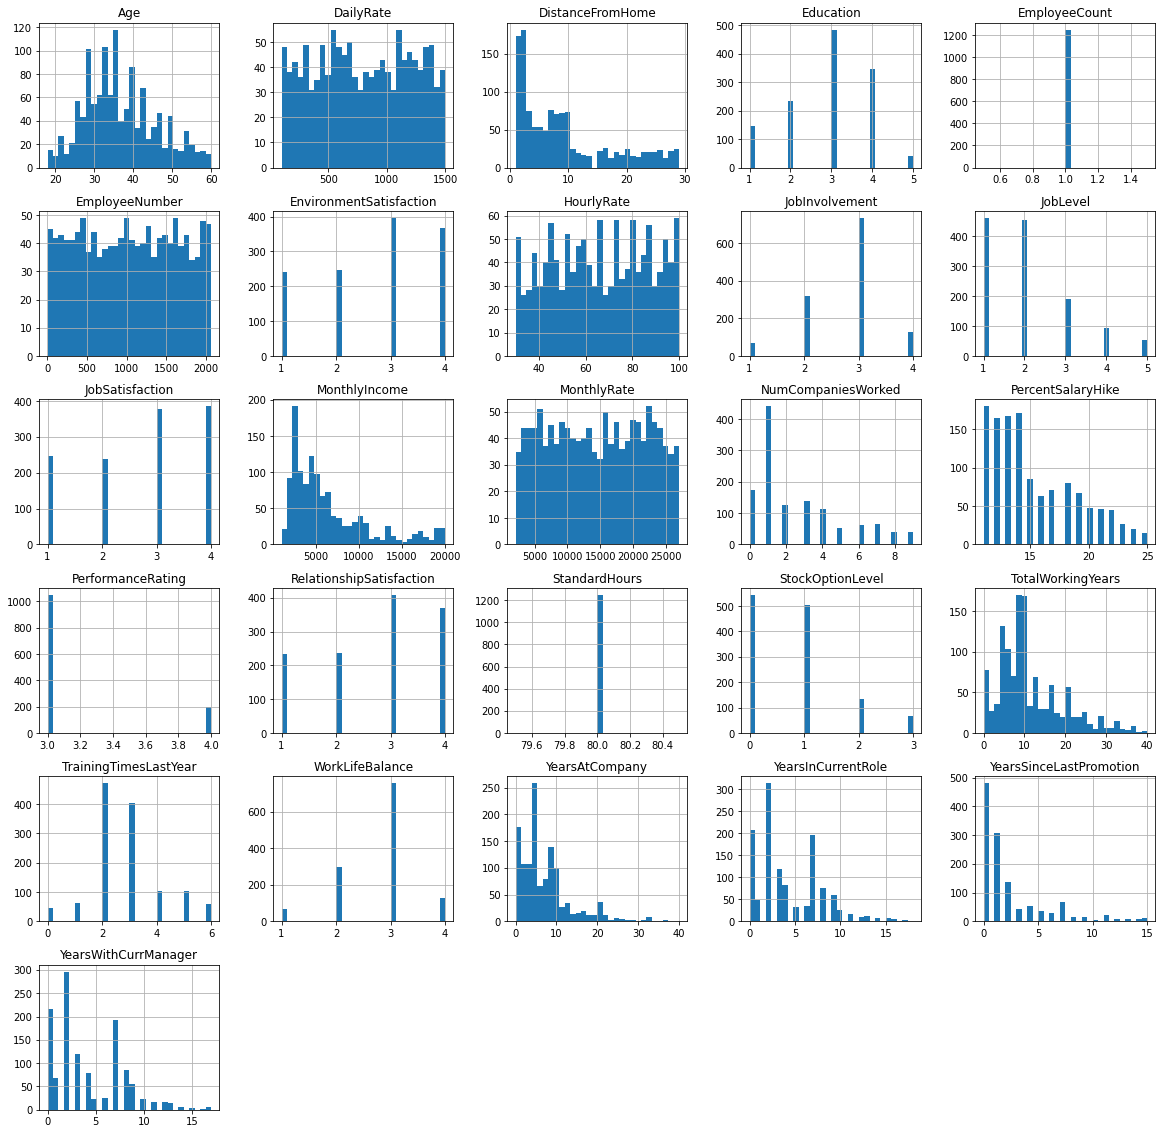

In [246]:

df_raw.select_dtypes(exclude='object').hist(bins=30,figsize=(20,20));

<AxesSubplot:>

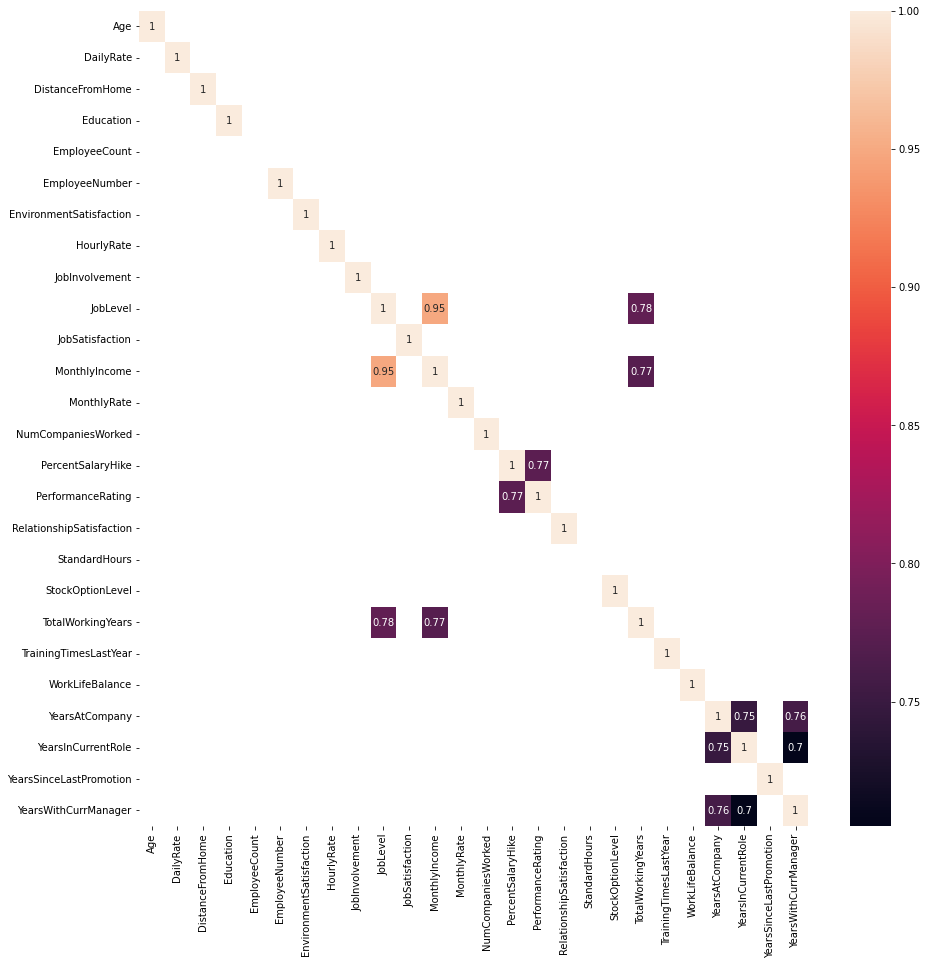

In [247]:
# Análise de Correlão
corr = df_raw.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr[abs(corr)>0.7], annot=True)

In [248]:
# Vamos Deletar:
deletar = ['Over18','EmployeeNumber', 'EmployeeCount', 'StandardHours']
df = df_raw.drop(deletar, axis=1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,46,No,Travel_Frequently,1211,Sales,5,4,Marketing,1,Male,...,4,3,0,14,4,3,9,6,0,8
1,21,No,Travel_Rarely,1343,Sales,22,1,Technical Degree,3,Male,...,3,3,0,3,2,3,3,2,1,2
2,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,...,4,2,1,1,2,3,1,0,0,0
3,32,No,Travel_Rarely,977,Research & Development,2,3,Medical,4,Male,...,3,3,2,10,4,2,9,5,1,6
4,53,No,Travel_Frequently,124,Sales,2,3,Marketing,3,Female,...,3,1,1,30,2,3,15,7,6,12


In [249]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

class TranformIBMRH:
    def __init__(self):
        self.columns_obj = ['BusinessTravel','Gender','OverTime']
        self.dict_map_obj = [{'Travel_Rarely':3,'Travel_Frequently':2,'Non-Travel':1}, {'Female':0, 'Male':1},{'Yes':1, 'No':0}]
        self.columns_label = ['Gender', 'OverTime', 'BusinessTravel']
        self.columns_ohe = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']
        self.ohe = OneHotEncoder(sparse=False)

    def transform(self, df:pd.DataFrame, fit_ohe = None):
        # Mapeamendo de Variáveis categoricas Ordinais
        X = df.copy()
        for col,maps in zip(self.columns_obj, self.dict_map_obj):
            X['{}'.format(col)] = X['{}'.format(col)].map(maps)
        X_num = X.select_dtypes(exclude='object')

        if fit_ohe is None:
            self.ohe.fit(X[self.columns_ohe])
            X_cat = self.ohe.transform(X[self.columns_ohe])
            X_concat = pd.concat([pd.DataFrame(X_num),pd.DataFrame(X_cat)], axis=1)
            return X_concat, self.ohe
        else:
            X_cat = fit_ohe.transform(X[self.columns_ohe])
            X_concat = pd.concat([pd.DataFrame(X_num),pd.DataFrame(X_cat)], axis=1)
            return X_concat




Bool: Attrition, Gender, OverTime, BusinessTravel
Ordinal: BusinessTravel
Ohe: Department, EducationField, JobRole, MaritalStatus


In [250]:
transf = TranformIBMRH()
scaler  = StandardScaler()
split = StratifiedShuffleSplit(test_size=0.2)

df['Attrition'] = df['Attrition'].map({'No':0, 'Yes':1})
data, ohe = transf.transform(df)

for x,y in split.split(data, data['Attrition']):
    df_train =  data.iloc[x]
    df_val = data.iloc[y]

X_train,y_train, X_test, y_test = df_train.drop(['Attrition'], axis=1), \
                                  df_train['Attrition'], df_val.drop(['Attrition'], axis=1), \
                                  df_val['Attrition']




In [251]:
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((999, 47), (999,), (250, 47), (250,))

In [252]:
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [253]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics



In [254]:
def result_model(model,X_train, X_test, y_train, y_test):

    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    acc_train = metrics.accuracy_score(y_train,y_pred_train )
    acc_test =  metrics.accuracy_score(y_test, y_pred_test)
    f1_train = metrics.f1_score(y_train,y_pred_train, average='macro')
    f1_test =  metrics.f1_score(y_test, y_pred_test, average='macro')
    sns.heatmap(metrics.confusion_matrix(y_test,y_pred_test),annot=True)

    return print('Accuracy train: {}\nF1 train: {}\nAccuracy test: {}\nF1 test: {}'.format(acc_train,f1_train,acc_test,f1_test))


Accuracy train: 0.8838838838838838
F1 train: 0.7401424368541905
Accuracy test: 0.872
F1 test: 0.6879388360118583


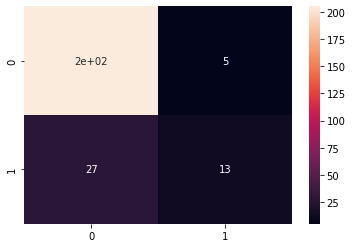

In [255]:
lg = LogisticRegression()

result_model(model=lg, X_train=X_train_norm, X_test=X_test_norm, y_train=y_train, y_test=y_test)

Accuracy train: 0.9119119119119119
F1 train: 0.7885876988783933
Accuracy test: 0.852
F1 test: 0.5292860414228283


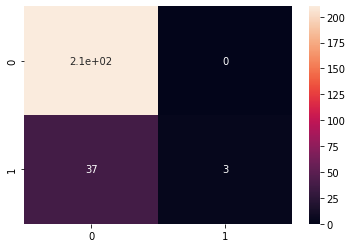

In [256]:
svc = SVC(kernel='rbf')

result_model(model=svc, X_train=X_train_norm, X_test=X_test_norm, y_train=y_train, y_test=y_test)

Accuracy train: 1.0
F1 train: 1.0
Accuracy test: 0.844
F1 test: 0.5238095238095238


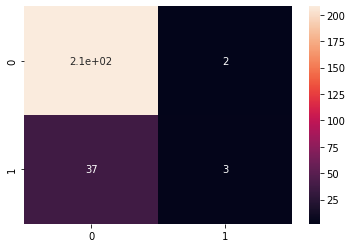

In [257]:
forest =RandomForestClassifier()

result_model(model=forest, X_train=X_train_norm, X_test=X_test_norm, y_train=y_train, y_test=y_test)

Accuracy train: 0.9719719719719719
F1 train: 0.9441649899396378
Accuracy test: 0.868
F1 test: 0.6829240170644528


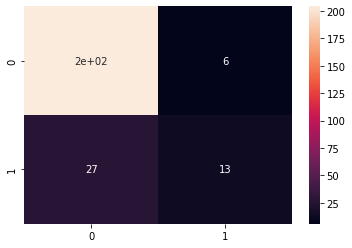

In [258]:
gbxt =  GradientBoostingClassifier()

result_model(model=gbxt, X_train=X_train_norm, X_test=X_test_norm, y_train=y_train, y_test=y_test)

In [259]:
import tensorflow as tf

In [260]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=32, activation='relu', input_shape=(47,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                1536      
                                                                 
 dropout_12 (Dropout)        (None, 32)                0         
                                                                 
 dense_19 (Dense)            (None, 64)                2112      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 128)               8320      
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 64)               

In [261]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall()])

In [262]:
model.fit(X_train_norm, y_train, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 0.5088 - recall_2: 0.0497
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4361 - recall_2: 0.0000e+00
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4270 - recall_2: 0.0000e+00
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4077 - recall_2: 0.0000e+00
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3784 - recall_2: 0.0000e+00
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3662 - recall_2: 0.0559
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3602 - recall_2: 0.1118
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3478 - recall_2: 0.2174
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3331 - recall_2: 0.2360
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3145 - recall_2: 

In [263]:
y_pred = model.predict(X_test_norm)
y_pred = (y_pred > 0.5)
metrics.f1_score(y_test, y_pred)

8/8 [==============================] - 0s 856us/step


0.36065573770491804

# Tuning Hiperparametros

In [264]:
from sklearn.model_selection import StratifiedGroupKFold, GridSearchCV


In [265]:
cv = StratifiedGroupKFold(n_splits=10)

hipers = {
    'solver':['lbfgs','newton-cg','saga'],
    'penalty':['l2', 'none'],
    'max_iter':[500,700,800]}

metric = metrics.make_scorer(metrics.f1_score)

lg = LogisticRegression()

clf = GridSearchCV(lg, param_grid=hipers, cv=20, scoring='recall')
clf.fit(X_train_norm, y_train)

GridSearchCV(cv=20, estimator=LogisticRegression(),
             param_grid={'max_iter': [500, 700, 800], 'penalty': ['l2', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'saga']},
             scoring='recall')

In [267]:
clf.best_params_


{'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}

In [266]:
ypred = clf.predict(X_test_norm)
metrics.f1_score(y_test,ypred, average='macro')

0.6879388360118583

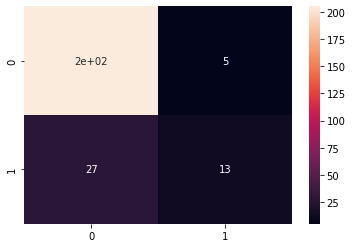

In [268]:
sns.heatmap(metrics.confusion_matrix(y_test, ypred),annot=True);

In [269]:
model_final = clf.best_estimator_
model_final

LogisticRegression(max_iter=500)

In [270]:
df_r = df_teste.reset_index().drop(['index']+deletar, axis=1)
X_teste_final = transf.transform(df_r,ohe)
y_teste_final = df_teste['Attrition'].map({'No':0, 'Yes':1})


In [271]:
X_test = scaler.transform(X_teste_final)

In [277]:
y_pred = model_final.predict(X_test)
print(metrics.classification_report(y_teste_final,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       185
           1       0.71      0.33      0.45        36

    accuracy                           0.87       221
   macro avg       0.79      0.65      0.69       221
weighted avg       0.85      0.87      0.85       221



In [226]:
import pickle

with open('../models/variveis_modelo.pkl', 'wb') as f:
    pickle.dump([scaler, ohe,model_final], f)

# Fim

In [228]:
with open('../models/variveis_modelo.pkl', 'rb') as f:
    sc_test,ohe_pkl, md_test = pickle.load(f)

In [229]:
teste = TranformIBMRH().transform(df, ohe_pkl)

In [230]:
teste

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,11,12,13,14,15,16,17,18,19,20
0,35,0,3,384,8,4,1,0,72,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,37,0,3,1239,8,2,3,1,89,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,35,0,3,1370,27,4,4,1,49,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,35,0,3,817,1,3,4,0,60,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,32,0,3,427,1,3,1,1,33,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,47,0,3,1001,4,3,3,0,92,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1245,35,0,3,660,7,1,4,1,76,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1246,34,0,2,878,10,4,4,1,43,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1247,44,0,3,528,1,3,3,0,44,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [231]:
sc_test.transform(teste.drop('Attrition', axis=1))

C:\Users\Vinicius\Documents\DataProjets\ibm-rh\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([[-0.21620112,  0.58032844, -1.05226066, ..., -0.54225589,
         1.10008045, -0.68649931],
       [ 0.00262859,  0.58032844,  1.06331477, ...,  1.84414779,
        -0.90902443, -0.68649931],
       [-0.21620112,  0.58032844,  1.38745557, ..., -0.54225589,
         1.10008045, -0.68649931],
       ...,
       [-0.32561597, -0.92160968,  0.17007181, ...,  1.84414779,
        -0.90902443, -0.68649931],
       [ 0.76853255,  0.58032844, -0.69595322, ...,  1.84414779,
        -0.90902443, -0.68649931],
       [ 0.00262859,  0.58032844,  1.22662235, ..., -0.54225589,
        -0.90902443,  1.45666571]])

In [155]:
teste

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,11,12,13,14,15,16,17,18,19,20
0,35,0,3,384,8,4,1,0,72,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,37,0,3,1239,8,2,3,1,89,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,35,0,3,1370,27,4,4,1,49,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,35,0,3,817,1,3,4,0,60,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,32,0,3,427,1,3,1,1,33,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,47,0,3,1001,4,3,3,0,92,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1245,35,0,3,660,7,1,4,1,76,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1246,34,0,2,878,10,4,4,1,43,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1247,44,0,3,528,1,3,3,0,44,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [129]:
tran_test.transform(df)

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,11,12,13,14,15,16,17,18,19,20
0,35,0,3,384,8,4,1,0,72,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,37,0,3,1239,8,2,3,1,89,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,35,0,3,1370,27,4,4,1,49,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,35,0,3,817,1,3,4,0,60,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,32,0,3,427,1,3,1,1,33,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,47,0,3,1001,4,3,3,0,92,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1245,35,0,3,660,7,1,4,1,76,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1246,34,0,2,878,10,4,4,1,43,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1247,44,0,3,528,1,3,3,0,44,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [299]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,31,No,Travel_Rarely,480,Research & Development,7,2,Medical,2,Female,...,3,2,1,13,5,1,13,10,3,12
1,44,Yes,Travel_Frequently,429,Research & Development,1,2,Medical,3,Male,...,3,3,3,6,2,2,5,3,2,3
2,29,No,Travel_Rarely,1082,Research & Development,9,4,Medical,4,Female,...,3,3,1,9,2,3,5,3,1,2
3,26,No,Travel_Rarely,933,Sales,1,3,Life Sciences,3,Male,...,3,2,1,8,3,3,8,7,7,7
4,40,No,Travel_Rarely,543,Research & Development,1,4,Life Sciences,1,Male,...,3,3,2,8,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,60,No,Travel_Frequently,1499,Sales,28,3,Marketing,3,Female,...,3,4,0,22,5,4,18,13,13,11
1245,26,No,Travel_Rarely,1355,Human Resources,25,1,Life Sciences,3,Female,...,4,4,1,8,3,3,8,7,5,7
1246,31,No,Non-Travel,979,Research & Development,1,4,Medical,3,Male,...,3,4,1,6,2,3,5,4,1,4
1247,36,No,Travel_Rarely,172,Research & Development,4,4,Life Sciences,1,Male,...,3,3,0,10,2,2,10,4,1,8


In [332]:
a = dict(df.iloc[1])
a.keys()

dict_keys(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'])

In [31]:
df.iloc[1].to_json('teste.json')

In [333]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [331]:
pd.DataFrame(columns=a.keys(),data=[a.values()])

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,44,Yes,Travel_Frequently,429,Research & Development,1,2,Medical,3,Male,...,3,3,3,6,2,2,5,3,2,3


In [327]:
np.array(a.values)

array(<built-in method values of dict object at 0x000002077CD11140>,
      dtype=object)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,31,0,Travel_Rarely,480,Research & Development,7,2,Medical,2,Female,...,3,2,1,13,5,1,13,10,3,12
1,44,1,Travel_Frequently,429,Research & Development,1,2,Medical,3,Male,...,3,3,3,6,2,2,5,3,2,3
2,29,0,Travel_Rarely,1082,Research & Development,9,4,Medical,4,Female,...,3,3,1,9,2,3,5,3,1,2
3,26,0,Travel_Rarely,933,Sales,1,3,Life Sciences,3,Male,...,3,2,1,8,3,3,8,7,7,7
4,40,0,Travel_Rarely,543,Research & Development,1,4,Life Sciences,1,Male,...,3,3,2,8,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,60,0,Travel_Frequently,1499,Sales,28,3,Marketing,3,Female,...,3,4,0,22,5,4,18,13,13,11
1245,26,0,Travel_Rarely,1355,Human Resources,25,1,Life Sciences,3,Female,...,4,4,1,8,3,3,8,7,5,7
1246,31,0,Non-Travel,979,Research & Development,1,4,Medical,3,Male,...,3,4,1,6,2,3,5,4,1,4
1247,36,0,Travel_Rarely,172,Research & Development,4,4,Life Sciences,1,Male,...,3,3,0,10,2,2,10,4,1,8


# Preprocessamento

In [16]:
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
{'Single':1,'Married':2,'Divorced':3},

In [34]:
class TransformCategoricalFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.columns = ['Attrition','BusinessTravel','Gender','OverTime']
        self.dict_map = [{'Yes':1,'No':0},{'Travel_Rarely':3,'Travel_Frequently':2,'Non-Travel':1}, {'Female':0, 'Male':1},{'Yes':1, 'No':0}]

    def fit(self,X, y=None):
        return self

    def transform(self, df, y=None):
        X = df.copy()
        for col,maps in zip(self.columns, self.dict_map):
            X['{}'.format(col)] = X['{}'.format(col)].map(maps)


        return X

In [18]:
def retorna_ix(data:pd.DataFrame, colunas:list):
    ix = [data.columns.get_loc(c) for c in colunas]
    return ix

In [19]:
retorna_ix(df,df.select_dtypes(exclude='object').columns)

[0,
 3,
 5,
 6,
 8,
 10,
 11,
 12,
 14,
 16,
 17,
 18,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

In [24]:
print(df.columns.values)

['Age' 'Attrition' 'BusinessTravel' 'DailyRate' 'Department'
 'DistanceFromHome' 'Education' 'EducationField' 'EnvironmentSatisfaction'
 'Gender' 'HourlyRate' 'JobInvolvement' 'JobLevel' 'JobRole'
 'JobSatisfaction' 'MaritalStatus' 'MonthlyIncome' 'MonthlyRate'
 'NumCompaniesWorked' 'OverTime' 'PercentSalaryHike' 'PerformanceRating'
 'RelationshipSatisfaction' 'StockOptionLevel' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager']


In [51]:
cat_ord = ['Attrition','BusinessTravel','Gender','OverTime']
cat_ohe = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']
num_var = retorna_ix(df,df.select_dtypes(exclude='object').columns)

pipeline_num = Pipeline([('scaler',StandardScaler())])

full_pipeline = ColumnTransformer([
    ('LabelEncoder',TransformCategoricalFeatures(),cat_ord),
    ('ohe', OneHotEncoder(sparse=False),cat_ohe)
])

pipeline_num = Pipeline([
    ('cat', full_pipeline),
    ('scaler',StandardScaler())])

In [58]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1032,39,Yes,Non-Travel,592,Research & Development,2,3,Life Sciences,1,Female,...,4,2,0,11,2,4,1,0,0,0
545,30,No,Travel_Rarely,501,Sales,27,5,Marketing,3,Male,...,4,4,1,10,2,2,8,7,7,7
1247,31,No,Travel_Rarely,1003,Sales,5,3,Technical Degree,1,Male,...,3,3,1,6,3,3,5,2,0,2
311,45,No,Travel_Frequently,1249,Research & Development,7,3,Life Sciences,1,Male,...,3,1,1,24,2,3,24,9,9,11
862,44,No,Non-Travel,111,Research & Development,17,3,Life Sciences,4,Male,...,3,4,0,6,3,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,36,No,Travel_Rarely,1040,Research & Development,3,2,Life Sciences,4,Male,...,4,1,1,13,3,3,5,4,0,4
69,36,Yes,Travel_Rarely,318,Research & Development,9,3,Medical,4,Male,...,3,1,1,2,0,2,1,0,0,0
1165,44,No,Travel_Frequently,602,Human Resources,1,5,Human Resources,1,Male,...,3,3,0,14,3,3,10,7,0,2
1188,29,No,Travel_Rarely,991,Sales,5,3,Medical,1,Male,...,3,2,1,10,3,2,10,0,0,9


In [57]:
full_pipeline.fit_transform(df)

array([[1., 1., 0., ..., 0., 0., 1.],
       [0., 3., 1., ..., 1., 0., 0.],
       [0., 3., 1., ..., 0., 1., 0.],
       ...,
       [0., 2., 1., ..., 0., 1., 0.],
       [0., 3., 1., ..., 1., 0., 0.],
       [0., 3., 1., ..., 0., 1., 0.]])

In [54]:
pipeline_num.fit_transform(df)

ValueError: could not convert string to float: 'Yes'

In [55]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1032,39,Yes,Non-Travel,592,Research & Development,2,3,Life Sciences,1,Female,...,4,2,0,11,2,4,1,0,0,0
545,30,No,Travel_Rarely,501,Sales,27,5,Marketing,3,Male,...,4,4,1,10,2,2,8,7,7,7
1247,31,No,Travel_Rarely,1003,Sales,5,3,Technical Degree,1,Male,...,3,3,1,6,3,3,5,2,0,2
311,45,No,Travel_Frequently,1249,Research & Development,7,3,Life Sciences,1,Male,...,3,1,1,24,2,3,24,9,9,11
862,44,No,Non-Travel,111,Research & Development,17,3,Life Sciences,4,Male,...,3,4,0,6,3,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,36,No,Travel_Rarely,1040,Research & Development,3,2,Life Sciences,4,Male,...,4,1,1,13,3,3,5,4,0,4
69,36,Yes,Travel_Rarely,318,Research & Development,9,3,Medical,4,Male,...,3,1,1,2,0,2,1,0,0,0
1165,44,No,Travel_Frequently,602,Human Resources,1,5,Human Resources,1,Male,...,3,3,0,14,3,3,10,7,0,2
1188,29,No,Travel_Rarely,991,Sales,5,3,Medical,1,Male,...,3,2,1,10,3,2,10,0,0,9


In [53]:
full_pipeline.fit_transform(df)

array([[1., 1., 0., ..., 0., 0., 1.],
       [0., 3., 1., ..., 1., 0., 0.],
       [0., 3., 1., ..., 0., 1., 0.],
       ...,
       [0., 2., 1., ..., 0., 1., 0.],
       [0., 3., 1., ..., 1., 0., 0.],
       [0., 3., 1., ..., 0., 1., 0.]])

In [121]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,35,0,Travel_Rarely,384,Sales,8,4,Life Sciences,1,Female,...,3,2,1,3,1,2,3,2,0,2
1,37,0,Travel_Rarely,1239,Human Resources,8,2,Other,3,Male,...,3,3,0,19,4,2,10,0,4,7
2,35,0,Travel_Rarely,1370,Research & Development,27,4,Life Sciences,4,Male,...,3,2,1,17,3,3,7,7,0,7
3,35,0,Travel_Rarely,817,Research & Development,1,3,Medical,4,Female,...,3,2,1,10,0,3,9,7,0,0
4,32,0,Travel_Rarely,427,Research & Development,1,3,Medical,1,Male,...,4,2,1,9,3,3,9,8,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,47,0,Travel_Rarely,1001,Research & Development,4,3,Life Sciences,3,Female,...,3,3,1,28,4,3,22,11,14,10
1245,35,0,Travel_Rarely,660,Sales,7,1,Life Sciences,4,Male,...,3,1,1,1,3,3,1,0,0,0
1246,34,0,Travel_Frequently,878,Research & Development,10,4,Medical,4,Male,...,3,4,1,5,4,4,5,3,2,0
1247,44,0,Travel_Rarely,528,Human Resources,1,3,Life Sciences,3,Female,...,3,1,3,8,2,3,2,2,2,2


In [39]:
TransformCategoricalFeatures().fit_transform(df)[cat_ohe]

,Department,EducationField,JobRole,MaritalStatus
1032,Research & Development,Life Sciences,Laboratory Technician,Single
545,Sales,Marketing,Sales Executive,Divorced
1247,Sales,Technical Degree,Sales Executive,Married
311,Research & Development,Life Sciences,Laboratory Technician,Divorced
862,Research & Development,Life Sciences,Research Scientist,Single
...,...,...,...,...
1183,Research & Development,Life Sciences,Healthcare Representative,Divorced
69,Research & Development,Medical,Research Scientist,Married
1165,Human Resources,Human Resources,Human Resources,Married
1188,Sales,Medical,Sales Executive,Divorced


#

In [42]:
teste  = OneHotEncoder(sparse=False).fit_transform(TransformCategoricalFeatures().fit_transform(df)[cat_ohe])

In [45]:
teste.get_feature_names()

AttributeError: 'numpy.ndarray' object has no attribute 'get_feature_names'

In [ ]:
OneHotEncoder.ge

In [44]:
full_pipeline.fit_transform(df)


array([[0., 3., 1., ..., 0., 1., 0.],
       [0., 3., 0., ..., 0., 0., 1.],
       [0., 3., 0., ..., 0., 1., 0.],
       ...,
       [1., 2., 0., ..., 0., 0., 1.],
       [0., 3., 0., ..., 0., 1., 0.],
       [0., 3., 1., ..., 1., 0., 0.]])

In [23]:
df.values

array([[25, 'No', 'Travel_Rarely', ..., 2, 1, 2],
       [59, 'No', 'Travel_Rarely', ..., 1, 0, 5],
       [22, 'No', 'Travel_Rarely', ..., 1, 1, 2],
       ...,
       [30, 'Yes', 'Travel_Frequently', ..., 2, 1, 2],
       [30, 'No', 'Travel_Rarely', ..., 2, 6, 7],
       [55, 'No', 'Travel_Rarely', ..., 7, 0, 0]], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit


In [45]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
276,35,No,Travel_Rarely,1315,Research & Development,22,3,Life Sciences,2,Female,...,3,2,1,10,6,2,7,7,6,2
226,37,No,Travel_Frequently,319,Sales,4,4,Marketing,1,Male,...,3,3,1,13,2,3,9,8,5,8
563,25,No,Travel_Rarely,883,Sales,26,1,Medical,3,Female,...,4,2,0,6,5,2,6,5,1,4
790,33,No,Travel_Rarely,654,Research & Development,5,3,Life Sciences,4,Male,...,3,3,1,9,2,3,3,2,1,2
1022,37,No,Non-Travel,1413,Research & Development,5,2,Technical Degree,3,Male,...,3,1,0,7,2,1,6,5,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,53,No,Travel_Frequently,124,Sales,2,3,Marketing,3,Female,...,3,1,1,30,2,3,15,7,6,12
1435,44,No,Travel_Rarely,1037,Research & Development,1,3,Medical,2,Male,...,3,3,0,6,2,3,4,3,1,2
654,39,No,Travel_Rarely,1383,Human Resources,2,3,Life Sciences,4,Female,...,3,3,2,13,2,3,5,4,0,4
465,46,No,Travel_Frequently,1034,Research & Development,18,1,Medical,1,Female,...,3,4,0,28,3,2,2,2,1,2
